# Neurons and Layers
Using: Tensorflow and Keras (as well as stuff used in regression from course 1)
Keras creates a simple, layer-centric interface to Tensorflow, so that'll be used frequently.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

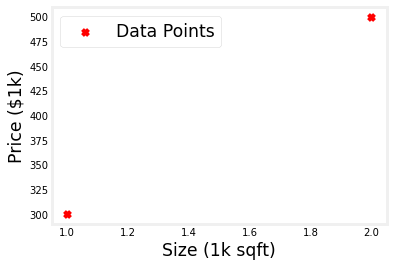

In [2]:
# Regression example from a simpler time
X_train = np.array([[1.0], [2.0]])
Y_train = np.array([[300.0], [500.0]])
fig, ax = plt.subplots(1, 1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend(fontsize='xx-large')
ax.set_ylabel("Price ($1k)", fontsize='xx-large')
ax.set_xlabel('Size (1k sqft)', fontsize='xx-large')
plt.show()

In [3]:
# Regression - a neuron with no activation
# Can define a layer with 1 neuron:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear')
# At this stage, no weights:
print(linear_layer.get_weights())
# Not yet instantiated. Try it on an example in the training set to trigger it.
# Note - input must be 2D, may require reshaping.

a1 = linear_layer(X_train[0].reshape(1, 1))
print(a1)
# Default value for weights is...random (and small), and bias defaults to 0:
w, b = linear_layer.get_weights()
print(f"w: {w}\tb: {b}")
# Looks like regression to me.


[]
tf.Tensor([[-0.32]], shape=(1, 1), dtype=float32)
w: [[-0.32]]	b: [0.]


2022-06-29 17:29:45.623817: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-29 17:29:45.623969: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-29 17:29:45.624522: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
# Let's de-randomize:
w = np.array([[200]])
b = np.array([100])
linear_layer.set_weights([w, b])
print(linear_layer.get_weights())

a1 = linear_layer(X_train[0].reshape(1, 1))
a_lin = np.dot(w, X_train[0].reshape(1, 1)) + b
print(a_lin)

[array([[200.]], dtype=float32), array([100.], dtype=float32)]
[[300.]]


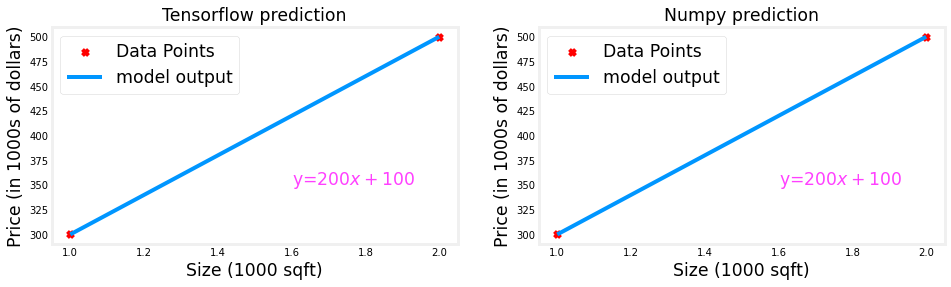

In [6]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, w) + b
plt_linear(X_train, Y_train, prediction_tf, prediction_np)

With sigmoid activation? Use a slightly different dataset, also from the previous course:

In [7]:
X_train = np.array([0., 1, 2, 3, 4, 5]).reshape(-1, 1)
Y_train = np.array([0, 0, 0, 1, 1, 1]).reshape(-1, 1)
pos = Y_train == 1
neg = Y_train == 0
X_train[pos]

array([3., 4., 5.])

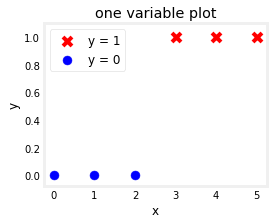

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', c='r', s=80, label="y = 1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', c='blue', s=80, label="y = 0")

ax.set_ylim(-0.08, 1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

Implement a logistic neuron by adding a sigmoid activation...through TF.

In [9]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1, activation='sigmoid', name='L1')
    ]
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
logistic_layer = model.get_layer('L1')
w, b = logistic_layer.get_weights()
print(w, w.shape, b, b.shape)

[[0.86]] (1, 1) [0.] (1,)


In [12]:
# Er, let's reset those
w = np.array([[2]])
b = np.array([-4.5])
logistic_layer.set_weights([w, b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [13]:
a1 = model.predict(X_train[0].reshape(1, 1))
print(a1)
alog = sigmoidnp(np.dot(w, X_train[0].reshape(1, 1)) + b)
print(alog)

[[0.01]]
[[0.01]]


2022-06-29 18:20:45.533702: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-29 18:20:45.553548: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3693215000 Hz


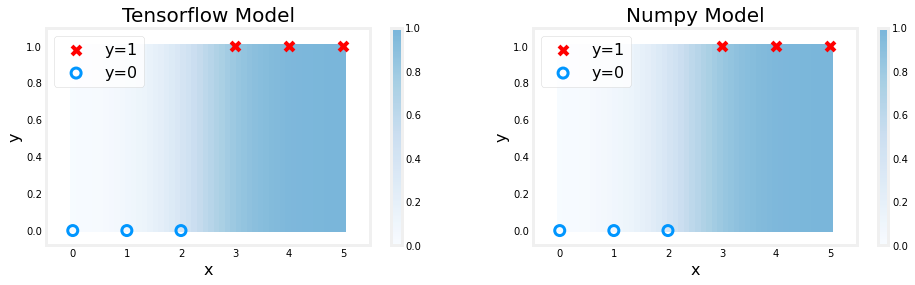

In [14]:
plt_logistic(X_train, Y_train, model, w, b, pos, neg)